### Clustering Analysis

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
#!pip install openpyxl

In [20]:
import os
cwd = os.getcwd()
cwd

'D:\\Class work\\2nd Year\\4th Sem\\Capstone\\Segmentation\\New folder (2)'

In [21]:
df= pd.read_excel('D:\\Class work\\2nd Year\\4th Sem\\Capstone\\Segmentation\\Actual_analysis\\Review Analysis\\Combined_metrics_1.xlsx')


In [22]:
df.head(2)

,Unnamed: 0,Text,WC,Analytic,Clout,Authentic,Tone,Openness,Conscientiousness,Extraversion,...,RC3,RC4,RC5,RC6,RC10,RC9,RC7,RC8,Polarity,Sentiment
0,0,"As a longtime fan of IQ, I was excited when I ...",164,76.20,40.36,16.87,71.55,4.066667,1.118333,1.423333,...,11.214537,1.494544,3.449425,1.696473,-2.28488,2.651910,-0.982962,0.166945,0.322579,Good
1,1,As the massager in the equation I like that it...,35,44.59,4.35,43.37,99.00,4.760000,2.856667,1.906667,...,-1.565051,-0.392241,-0.929367,-2.051842,0.13362,-0.282078,-0.108822,0.147577,0.666667,Good


In [23]:
X = df.iloc[:,12:-2]

scaler = MinMaxScaler().fit(X)
data_scaler = scaler.transform(X)

X_scaled = pd.DataFrame(data=data_scaler,columns=list(X.columns),  index=X.index)

In [24]:
X_scaled.head()

,RC1,RC2,RC3,RC4,RC5,RC6,RC10,RC9,RC7,RC8
0,0.153477,0.270510,1.000000,0.196670,0.417281,0.737716,0.000000,0.513608,0.321486,0.605495
1,0.053969,0.070343,0.091159,0.058713,0.047135,0.300079,0.218614,0.202480,0.422663,0.602745
2,0.148108,0.074240,0.063327,0.062125,0.025721,0.522442,0.199966,0.214458,0.400380,0.720389
3,0.010187,1.000000,0.160350,0.194869,0.058923,0.529518,0.156472,0.178945,0.366347,0.691284
4,0.041584,0.057254,0.139059,0.044816,0.108700,0.305652,0.206221,0.344124,0.382422,0.555891


In [25]:
kmeans= KMeans(n_clusters=3,init='k-means++',random_state=24)
y=kmeans.fit_predict(X_scaled)
df['Cluster'] = y
df['Cluster'] = df['Cluster'].apply(lambda x:'Cluster 1' if x == 0 else ('Cluster 2' if x == 1 else 'Cluster 3')  )
df.sort_values(by=['Cluster']) 
df.head(2)

,Unnamed: 0,Text,WC,Analytic,Clout,Authentic,Tone,Openness,Conscientiousness,Extraversion,...,RC4,RC5,RC6,RC10,RC9,RC7,RC8,Polarity,Sentiment,Cluster
0,0,"As a longtime fan of IQ, I was excited when I ...",164,76.20,40.36,16.87,71.55,4.066667,1.118333,1.423333,...,1.494544,3.449425,1.696473,-2.28488,2.651910,-0.982962,0.166945,0.322579,Good,Cluster 2
1,1,As the massager in the equation I like that it...,35,44.59,4.35,43.37,99.00,4.760000,2.856667,1.906667,...,-0.392241,-0.929367,-2.051842,0.13362,-0.282078,-0.108822,0.147577,0.666667,Good,Cluster 2


In [26]:
from sklearn.decomposition import PCA
pca = PCA(2)
 
#Transform the data
df1 = pca.fit_transform(X_scaled)

In [27]:
df1.shape

(28, 2)

In [28]:

#Initialize the class object
kmeans = KMeans(n_clusters= 3,init='k-means++',random_state=24)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df1)
 
print(label)

[0 2 1 1 2 2 2 1 1 1 2 1 2 0 2 1 1 1 1 0 1 0 1 1 0 2 2 0]


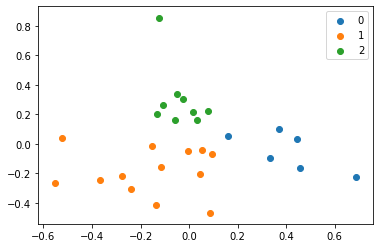

In [29]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df1[label == i , 0] , df1[label == i , 1] , label = i)
plt.legend()
plt.show()

In [30]:
df.to_excel('D:\\Class work\\2nd Year\\4th Sem\\Capstone\\Segmentation\\Actual_analysis\\Review Analysis\\cluster_analysis_1.xlsx',index=False)

---

In [31]:
df= pd.read_excel('D:\\Class work\\2nd Year\\4th Sem\\Capstone\\Segmentation\\Actual_analysis\\Review Analysis\\cluster_analysis_1.xlsx')

In [32]:
df=df.drop(columns=['Unnamed: 0','Text','WC','Polarity','Sentiment'])
df.head()

,Analytic,Clout,Authentic,Tone,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,RC1,RC2,RC3,RC4,RC5,RC6,RC10,RC9,RC7,RC8,Cluster
0,76.20,40.36,16.87,71.55,4.066667,1.118333,1.423333,1.342,0.610000,1.224584,3.384495,11.214537,1.494544,3.449425,1.696473,-2.284880,2.651910,-0.982962,0.166945,Cluster 2
1,44.59,4.35,43.37,99.00,4.760000,2.856667,1.906667,1.144,0.408571,-0.772610,-0.401240,-1.565051,-0.392241,-0.929367,-2.051842,0.133620,-0.282078,-0.108822,0.147577,Cluster 2
2,74.94,12.43,94.81,99.00,2.566667,1.283333,0.000000,1.538,0.000000,1.116823,-0.327541,-1.956411,-0.345580,-1.182697,-0.147329,-0.072685,-0.169118,-0.301334,0.976135,Cluster 1
3,43.45,32.10,34.47,95.29,1.553333,1.940000,1.550000,0.000,0.332857,-1.651336,17.181246,-0.592122,1.469903,-0.789921,-0.086725,-0.553850,-0.504018,-0.595375,0.771149,Cluster 2
4,18.82,9.13,10.08,99.00,1.110000,1.110000,4.443333,1.332,0.475714,-1.021191,-0.648800,-0.891510,-0.582308,-0.201064,-2.004105,-0.003482,1.053650,-0.456491,-0.182417,Cluster 2


In [33]:
pivot=pd.pivot_table(df, index= 'Cluster', aggfunc=np.mean)

In [34]:
pivot.reset_index(inplace=True)

In [35]:
trans_data=pivot.melt(id_vars=['Cluster'])
trans_data.head()

,Cluster,variable,value
0,Cluster 1,Agreeableness,1.849556
1,Cluster 2,Agreeableness,1.519571
2,Cluster 3,Agreeableness,2.053200
3,Cluster 1,Analytic,34.202222
4,Cluster 2,Analytic,55.030000


In [36]:

OCEAN=['Openness','Conscientiousness','Extraversion','Agreeableness','Neuroticism']
Linguistic = ['Analytic','Clout','Authentic','Tone']

trans_data['Analysis'] = trans_data['variable'].apply(lambda x:'Personality' if x in OCEAN else ('Linguistic' if x in Linguistic else 'Themes')  )
trans_data.head()

,Cluster,variable,value,Analysis
0,Cluster 1,Agreeableness,1.849556,Personality
1,Cluster 2,Agreeableness,1.519571,Personality
2,Cluster 3,Agreeableness,2.053200,Personality
3,Cluster 1,Analytic,34.202222,Linguistic
4,Cluster 2,Analytic,55.030000,Linguistic


In [37]:
trans_data.to_excel('D:\\Class work\\2nd Year\\4th Sem\\Capstone\\Segmentation\\Actual_analysis\\Review Analysis\\Radar_data_1.xlsx',index=False)